1 BASIC STATISTICS

In [18]:
import pandas as pd

# Read the CSV file into a pandas DataFrame, without skipping the header
df = pd.read_csv('flow_data.csv', skiprows=1, header=None)

# Display the column names in the DataFrame
print("Column names:", df.columns)

# Display basic statistics
total_flows = len(df)
min_flow_size_bytes = df[9].min()
median_flow_size_bytes = df[9].median()
mean_flow_size_bytes = df[9].mean()
max_flow_size_bytes = df[9].max()

# Display the results
print("Total number of flows:", total_flows)

print("\nFlow size statistics (bytes):")
print("  Minimum:", min_flow_size_bytes)
print("  Median:", median_flow_size_bytes)
print("  Mean:", mean_flow_size_bytes)
print("  Maximum:", max_flow_size_bytes)


Column names: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')
Total number of flows: 243547

Flow size statistics (bytes):
  Minimum: 53.0
  Median: 1900.0
  Mean: 27183.193138500636
  Maximum: 65461.0


/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_3194/4214351282.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flow_data.csv', skiprows=1, header=None)


2. PLOT TRAFFIC VOLUME

/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_3194/2737003673.py:5: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flow_data.csv', skiprows=1, header=None)
/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_3194/2737003673.py:18: FutureWarning: Parsing 'EET' as tzlocal (dependent on system timezone) is deprecated and will raise in a future version. Pass the 'tz' keyword or call tz_localize after construction instead
  df[timestamp_column] = pd.to_datetime(df[timestamp_column])


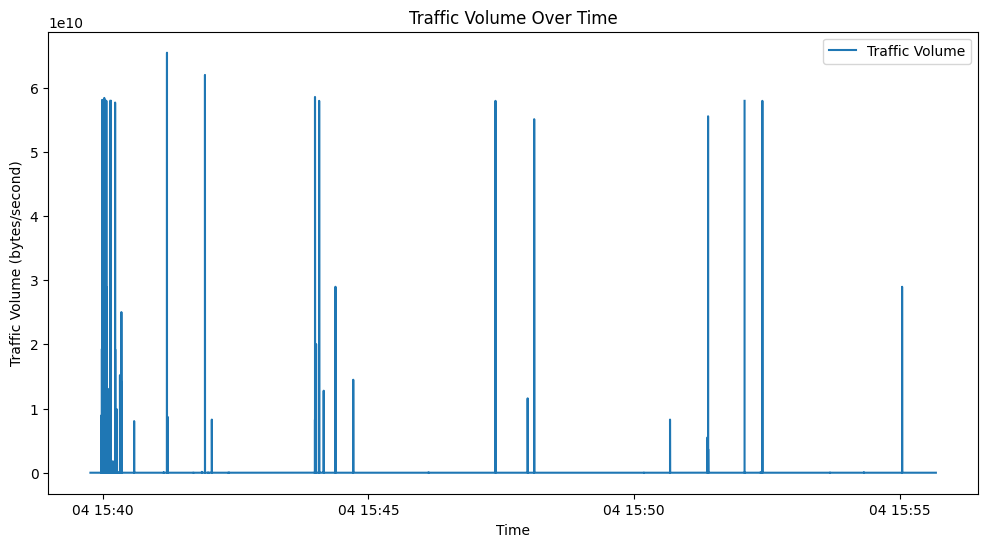

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('flow_data.csv', skiprows=1, header=None)

df['frame.time'] = df[1] + ' ' + df[2]

# Drop the unnecessary columns
df = df.drop([1, 2], axis=1)

# Assuming flow size is in the 9th column and 'frame.time' is now in the 1st column
flow_size_column = 9
timestamp_column = 'frame.time'

# Convert 'frame.time' to datetime format
df[timestamp_column] = pd.to_datetime(df[timestamp_column])

# Calculate flow duration in seconds
df['flow_duration'] = df[timestamp_column] - df[timestamp_column].shift(1)
df['flow_duration_seconds'] = df['flow_duration'].dt.total_seconds()

# Calculate traffic volume per second for each flow
df['traffic_volume_per_sec'] = df[flow_size_column] / df['flow_duration_seconds']

# Create a new DataFrame for plotting with time and traffic volume
plot_data = pd.DataFrame({
    'time': df[timestamp_column],
    'traffic_volume': df['traffic_volume_per_sec']
})

# Group by time and sum traffic volumes for overlapping intervals
plot_data = plot_data.groupby('time').sum().reset_index()

# Plot the traffic volume over time
plt.figure(figsize=(12, 6))
plt.plot(plot_data['time'], plot_data['traffic_volume'], label='Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Traffic Volume (bytes/second)')
plt.title('Traffic Volume Over Time')
plt.legend()
plt.show()


3.

In [21]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('flow_data.csv')

# Group by protocol and calculate statistics
top_protocols = df.groupby('frame.len').agg({
    'frame.number': 'count',
    'frame.len': 'sum',
}).sort_values(by='frame.number', ascending=False).head(5)

# Group by source port and calculate statistics
top_source_ports = df.groupby('tcp.srcport').agg({
    'frame.number': 'count',
    'frame.len': 'sum',
}).sort_values(by='frame.number', ascending=False).head(5)

# Group by destination port and calculate statistics
top_dest_ports = df.groupby('tcp.dstport').agg({
    'frame.number': 'count',
    'frame.len': 'sum',
}).sort_values(by='frame.number', ascending=False).head(5)

# Display the results
print("Top 5 Protocols:")
print(top_protocols)

print("\nTop 5 Source Ports:")
print(top_source_ports)

print("\nTop 5 Destination Ports:")
print(top_dest_ports)


/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_3194/1465582748.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flow_data.csv')


Top 5 Protocols:
           frame.number    frame.len
frame.len                           
1454.0           179426  260885404.0
66.0              54075    3568950.0
78.0               2766     215748.0
105.0               566      59430.0
94.0                564      53016.0

Top 5 Source Ports:
             frame.number    frame.len
tcp.srcport                           
443.0              136647  197370826.0
443                 47015   64448193.0
56597.0             37850    2728430.0
56597                3673     280519.0
56587                2517     200318.0

Top 5 Destination Ports:
             frame.number    frame.len
tcp.dstport                           
56597.0            142085  206245470.0
443.0               58302    5147451.0
56587.0              8864   12638955.0
56564.0              5258    7612336.0
56522.0              4741    4943129.0


4.

In [22]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('flow_data.csv')

# Group by source and destination IP addresses
host_pairs = df.groupby(['ip.src', 'ip.dst']).agg({
    'frame.number': 'count',
    'frame.len': 'sum',
}).reset_index()

# Rename columns for clarity
host_pairs.columns = ['Source IP', 'Destination IP', 'Number of Flows', 'Total Bytes']

# Display the top-ten host pairs based on the number of flows
top_pairs_flows = host_pairs.sort_values(by='Number of Flows', ascending=False).head(10)
print("Top-ten host pairs based on number of flows:")
print(top_pairs_flows)

# Display the top-ten host pairs based on the number of bytes
top_pairs_bytes = host_pairs.sort_values(by='Total Bytes', ascending=False).head(10)
print("\nTop-ten host pairs based on number of bytes:")
print(top_pairs_bytes)


/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_3194/1905911719.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flow_data.csv')


Top-ten host pairs based on number of flows:
           Source IP  Destination IP  Number of Flows  Total Bytes
111   74.125.162.135     172.20.10.3           142105  206262652.0
69       172.20.10.3  74.125.162.135            41544    3012806.0
77    193.229.108.13     172.20.10.3            16309   23105618.0
33       172.20.10.3  193.229.108.13             5373     464484.0
72    173.194.18.169     172.20.10.3             5258    7612336.0
91    216.58.210.142     172.20.10.3             4759    4953670.0
95    216.58.210.182     172.20.10.3             2596    3537929.0
80   193.229.108.207     172.20.10.3             2370    3286883.0
47       172.20.10.3  216.58.210.142             2263     706614.0
28       172.20.10.3  173.194.18.169             1954     142087.0

Top-ten host pairs based on number of bytes:
           Source IP  Destination IP  Number of Flows  Total Bytes
111   74.125.162.135     172.20.10.3           142105  206262652.0
77    193.229.108.13     172.20.10.3  

5

/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_3194/442007491.py:5: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flow_data.csv')


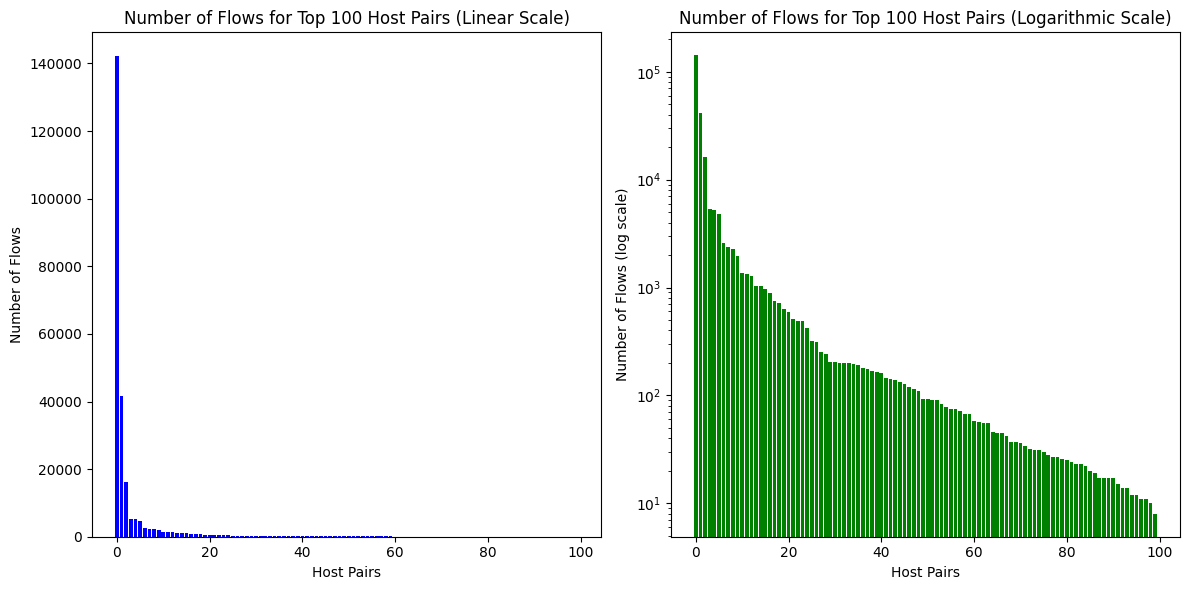

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('flow_data.csv')

# Group by source and destination IP addresses
host_pairs = df.groupby(['ip.src', 'ip.dst']).agg({
    'frame.number': 'count',
}).reset_index()

# Rename columns for clarity
host_pairs.columns = ['Source IP', 'Destination IP', 'Number of Flows']

# Sort by the number of flows in descending order
sorted_host_pairs = host_pairs.sort_values(by='Number of Flows', ascending=False)

# Select the top 100 host pairs
top_100_pairs = sorted_host_pairs.head(100)

# Plot the number of flows using a linear scale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(top_100_pairs)), top_100_pairs['Number of Flows'], color='blue')
plt.xlabel('Host Pairs')
plt.ylabel('Number of Flows')
plt.title('Number of Flows for Top 100 Host Pairs (Linear Scale)')

# Plot the number of flows using a logarithmic scale
plt.subplot(1, 2, 2)
plt.bar(range(len(top_100_pairs)), top_100_pairs['Number of Flows'], color='green')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Host Pairs')
plt.ylabel('Number of Flows (log scale)')
plt.title('Number of Flows for Top 100 Host Pairs (Logarithmic Scale)')

plt.tight_layout()
plt.show()


6.

/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_3194/3569751211.py:5: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flow_data.csv')


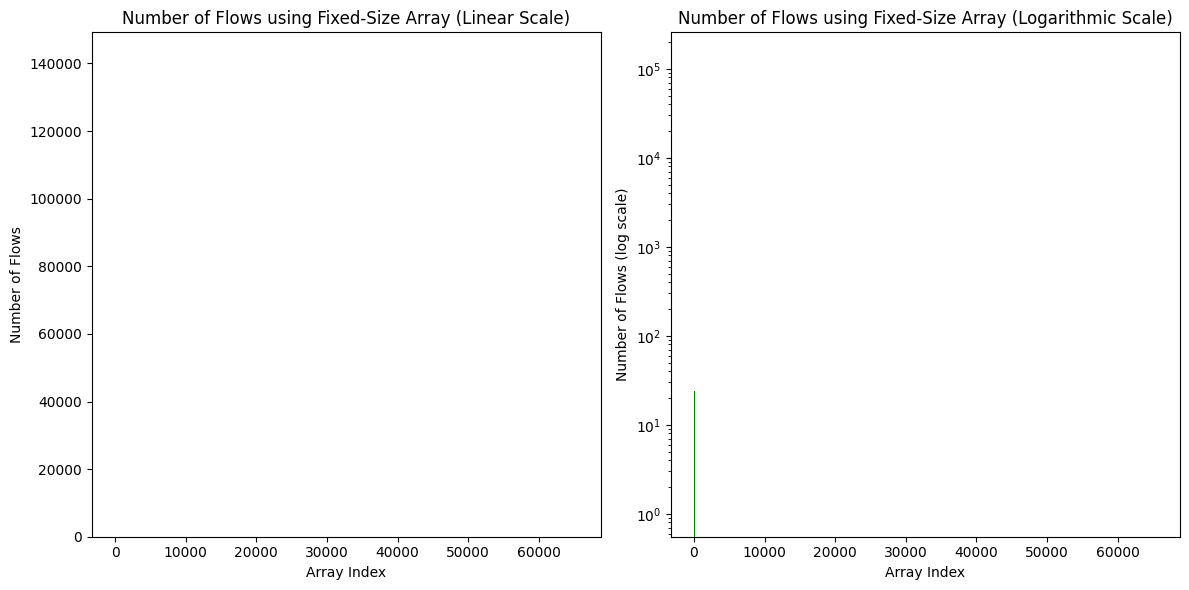

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('flow_data.csv')

# Define the fixed-size array (2^16 slots)
array_size = 2**16
flow_counts = [0] * array_size

# Define a simple hash function
def simple_hash(src, dst):
    return hash((src, dst)) & 0xFFFF

# Aggregate flows and store in the fixed-size array
for _, row in df.iterrows():
    src = row['ip.src']
    dst = row['ip.dst']
    key = simple_hash(src, dst)
    array_index = key % array_size
    flow_counts[array_index] += 1

# Create a DataFrame for plotting
array_df = pd.DataFrame({'Array Index': range(array_size), 'Number of Flows': flow_counts})

# Sort by the number of flows in descending order
sorted_array_df = array_df.sort_values(by='Number of Flows', ascending=False)

# Plot the number of flows using a linear scale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(array_size), sorted_array_df['Number of Flows'], color='blue')
plt.xlabel('Array Index')
plt.ylabel('Number of Flows')
plt.title('Number of Flows using Fixed-Size Array (Linear Scale)')

# Plot the number of flows using a logarithmic scale
plt.subplot(1, 2, 2)
plt.bar(range(array_size), sorted_array_df['Number of Flows'], color='green')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Array Index')
plt.ylabel('Number of Flows (log scale)')
plt.title('Number of Flows using Fixed-Size Array (Logarithmic Scale)')

plt.tight_layout()
plt.show()


7.

/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_3194/3930226700.py:6: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flow_data.csv')


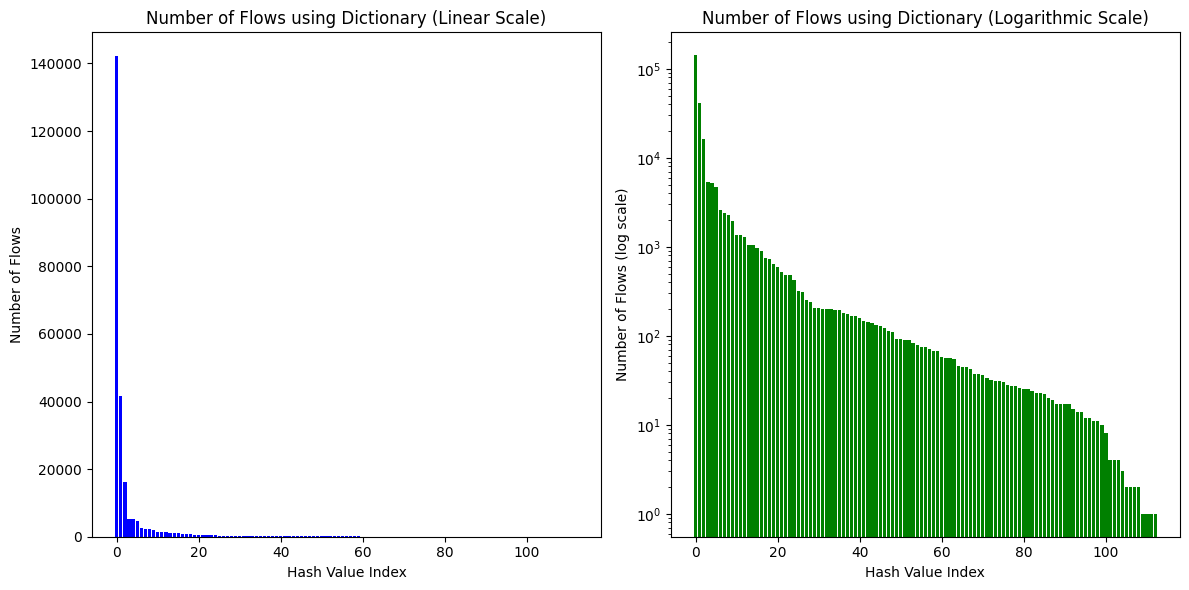

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('flow_data.csv')

# Use a dictionary to store non-zero flow counts
flow_counts = {}

# Aggregate flows and store in the dictionary
for _, row in df.iterrows():
    src = row['ip.src']
    dst = row['ip.dst']
    key = hash((src, dst))

    # Use a dictionary with default value 0
    flow_counts[key] = flow_counts.get(key, 0) + 1

# Create a DataFrame for plotting
array_df = pd.DataFrame({'Hash Value': list(flow_counts.keys()), 'Number of Flows': list(flow_counts.values())})

# Sort by the number of flows in descending order
sorted_array_df = array_df.sort_values(by='Number of Flows', ascending=False)

# Plot the number of flows using a linear scale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(sorted_array_df)), sorted_array_df['Number of Flows'], color='blue')
plt.xlabel('Hash Value Index')
plt.ylabel('Number of Flows')
plt.title('Number of Flows using Dictionary (Linear Scale)')

# Plot the number of flows using a logarithmic scale
plt.subplot(1, 2, 2)
plt.bar(range(len(sorted_array_df)), sorted_array_df['Number of Flows'], color='green')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Hash Value Index')
plt.ylabel('Number of Flows (log scale)')
plt.title('Number of Flows using Dictionary (Logarithmic Scale)')

plt.tight_layout()
plt.show()


3.3

In [33]:
import pandas as pd

# Assuming 'your_file_path_here.csv' is the path to your CSV file
data = pd.read_csv('flow_data.csv')

# Group by IP addresses and calculate the sum of frame lengths for each
host_byte_counts = data.groupby(['ip.src', 'ip.dst']).agg({'frame.len': 'sum'}).reset_index()

# Rename columns for clarity
host_byte_counts.columns = ['Source IP', 'Destination IP', 'Byte Count']

# Sort by byte count in descending order and select the top 15
top_hosts_by_bytes = host_byte_counts.sort_values(by='Byte Count', ascending=False).head(15)

print("Top 15 Hosts by Byte Counts:")
print(top_hosts_by_bytes)


Top 15 Hosts by Byte Counts:
           Source IP  Destination IP   Byte Count
111   74.125.162.135     172.20.10.3  206262652.0
77    193.229.108.13     172.20.10.3   23105618.0
72    173.194.18.169     172.20.10.3    7612336.0
91    216.58.210.142     172.20.10.3    4953670.0
95    216.58.210.182     172.20.10.3    3537929.0
80   193.229.108.207     172.20.10.3    3286883.0
69       172.20.10.3  74.125.162.135    3012806.0
71    173.194.18.168     172.20.10.3    1968801.0
82   193.229.108.237     172.20.10.3    1884707.0
79   193.229.108.206     172.20.10.3    1742653.0
107   74.125.104.202     172.20.10.3    1441190.0
81   193.229.108.236     172.20.10.3    1244443.0
110   74.125.160.200     172.20.10.3    1078804.0
76    193.229.108.12     172.20.10.3     996714.0
75   173.194.188.231     172.20.10.3     919097.0


/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_3194/292756351.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('flow_data.csv')


3.4

In [34]:
import pandas as pd

# Assuming 'your_file_path_here.csv' is the path to your CSV file
data = pd.read_csv('flow_data.csv')

# Group by IP addresses and calculate the count of frames for each
host_packet_counts = data.groupby(['ip.src', 'ip.dst']).agg({'frame.len': 'count'}).reset_index()

# Rename columns for clarity
host_packet_counts.columns = ['Source IP', 'Destination IP', 'Packet Count']

# Sort by packet count in descending order and select the top 15
top_hosts_by_packets = host_packet_counts.sort_values(by='Packet Count', ascending=False).head(15)

# Group by IP addresses and calculate the sum of frame lengths for each
host_byte_counts = data.groupby(['ip.src', 'ip.dst']).agg({'frame.len': 'sum'}).reset_index()

# Rename columns for clarity
host_byte_counts.columns = ['Source IP', 'Destination IP', 'Byte Count']

# Sort by byte count in descending order and select the top 15
top_hosts_by_bytes = host_byte_counts.sort_values(by='Byte Count', ascending=False).head(15)

# Display the results
print("Top 15 Hosts by Packet Counts:")
print(top_hosts_by_packets)

print("\nTop 15 Hosts by Byte Counts:")
print(top_hosts_by_bytes)


/var/folders/fk/g50hvxy96g9_g0fpht0rnbzh0000gn/T/ipykernel_3194/2439654978.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('flow_data.csv')


Top 15 Hosts by Packet Counts:
           Source IP  Destination IP  Packet Count
111   74.125.162.135     172.20.10.3        142105
69       172.20.10.3  74.125.162.135         41544
77    193.229.108.13     172.20.10.3         16309
33       172.20.10.3  193.229.108.13          5373
72    173.194.18.169     172.20.10.3          5258
91    216.58.210.142     172.20.10.3          4759
95    216.58.210.182     172.20.10.3          2596
80   193.229.108.207     172.20.10.3          2370
47       172.20.10.3  216.58.210.142          2263
28       172.20.10.3  173.194.18.169          1954
71    173.194.18.168     172.20.10.3          1374
82   193.229.108.237     172.20.10.3          1343
79   193.229.108.206     172.20.10.3          1274
51       172.20.10.3  216.58.210.182          1042
107   74.125.104.202     172.20.10.3          1035

Top 15 Hosts by Byte Counts:
           Source IP  Destination IP   Byte Count
111   74.125.162.135     172.20.10.3  206262652.0
77    193.229.108.13   

3.5

In [35]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Replace 'your_column_names' with the actual column names from your dataset

# Extract TCP ports
tcp_ports = data[data['ip.proto'] == 6]  # Assuming '6' corresponds to TCP in 'ip.proto'
top_tcp_ports = tcp_ports['tcp.dstport'].value_counts().head(10)

# Extract UDP ports
udp_ports = data[data['ip.proto'] == 17]  # Assuming '17' corresponds to UDP in 'ip.proto'
top_udp_ports = udp_ports['udp.dstport'].value_counts().head(5)

print("Top 10 TCP Ports by Packet Count:")
print(top_tcp_ports)

print("\nTop 5 UDP Ports by Packet Count:")
print(top_udp_ports)


Top 10 TCP Ports by Packet Count:
tcp.dstport
56597.0    129911
443.0       40591
56592.0      1387
56611.0      1149
56603.0      1098
56619.0       774
56609.0       754
56621.0       686
56522.0       462
993.0         252
Name: count, dtype: int64

Top 5 UDP Ports by Packet Count:
udp.dstport
443.0      76
57922.0    70
53.0       35
1900.0     20
123.0       6
Name: count, dtype: int64


3.6

3.7 /3.8